<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PM/Capstone_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Modelling part**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ftfy

     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=e1d93707bffba1533ca6b7d3dec01eff97de4b54387eba3e809f89645e934aae
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [ ]:
# importing libraries
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None




import time
# ML Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
import os; 
os.chdir('/content/drive/MyDrive/Great_Learning/Capstone')

In [ ]:
dataset = pd.read_csv("dataset1_mojibaked_LangDetect_NewColumnAdded.csv", encoding = 'utf-8')

In [ ]:
dataset.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,ConvertedToEnglish,Language
0,0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...,NaN,en
1,1,outlook,received from hmjdrvpb.komuaywn@gmail.com\n he...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hmjdrvpb.komuaywn@gmail....,NaN,en
2,2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com\n hi...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from eylqgodm.ybqk...,NaN,en
3,3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...,NaN,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error,NaN,no


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8417 non-null   int64  
 1   Short description            8408 non-null   object 
 2   Description                  8413 non-null   object 
 3   Caller                       8417 non-null   object 
 4   Assignment group             8417 non-null   object 
 5   combined_description_caller  8417 non-null   object 
 6   combined_description         8417 non-null   object 
 7   ConvertedToEnglish           0 non-null      float64
 8   Language                     8417 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 591.9+ KB


In [ ]:
dataset['Assignment group'].value_counts()


GRP_0     3934
GRP_8      645
GRP_24     285
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      183
GRP_13     145
GRP_10     140
GRP_5      128
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_31      69
GRP_17      68
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      38
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      28
GRP_47      27
GRP_48      25
GRP_62      25
GRP_23      25
GRP_39      19
GRP_27      18
GRP_60      16
GRP_37      16
GRP_36      15
GRP_44      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_46       6
GRP_59       6
GRP_49       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_68       3
GRP_58       3
GRP_63       3
GRP_56       3
GRP_38       3
GRP_71       2
GRP_57       2
GRP_72       2
GRP_54    

In [ ]:
dataset['Language'].value_counts()

en       7010
de        415
af        271
it        121
fr        105
no         71
nl         68
sv         53
zh-cn      49
es         47
ca         39
pl         27
da         25
ko         17
pt         17
tl         11
cy         11
ro         10
et         10
sq          8
sl          6
hr          6
fi          5
vi          3
id          3
so          2
lt          2
cs          2
ja          1
tr          1
hu          1
Name: Language, dtype: int64

In [ ]:
data_eng = dataset[dataset['Language']=='en']

In [ ]:
data_eng.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,ConvertedToEnglish,Language
0,0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...,NaN,en
1,1,outlook,received from hmjdrvpb.komuaywn@gmail.com\n he...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hmjdrvpb.komuaywn@gmail....,NaN,en
2,2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com\n hi...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from eylqgodm.ybqk...,NaN,en
3,3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...,NaN,en
5,5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,unable to log in to engineering tool and skype...,NaN,en


In [ ]:
dataset = pd.read_csv("df_ML.csv", encoding = 'utf-8')

In [ ]:
# Create a target categorical column
dataset['target'] = dataset['Assignment group'].astype('category').cat.codes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            8417 non-null   int64 
 1   Caller                8417 non-null   object
 2   Assignment group      8417 non-null   object
 3   combined_description  8417 non-null   object
 4   Language              8417 non-null   object
 5   ConvertedToEnglish    8416 non-null   object
 6   pred_group            301 non-null    object
 7   target                8417 non-null   int8  
dtypes: int64(1), int8(1), object(6)
memory usage: 468.6+ KB


In [ ]:
dataset['target'].value_counts()

0     3934
72     645
17     285
4      257
73     252
12     241
11     215
23     200
56     183
5      145
2      140
45     128
6      118
18     116
27     107
34     100
22      97
10      88
8       85
25      69
9       68
67      68
28      62
19      56
35      45
21      44
36      40
24      39
7       38
37      37
13      36
40      35
15      31
1       31
3       30
14      28
42      27
16      25
43      25
59      25
33      19
20      18
57      16
31      16
39      15
30      15
46      14
49      11
62      11
48       9
47       8
51       8
55       6
44       6
41       6
38       5
63       4
26       4
54       3
65       3
52       3
60       3
32       3
70       2
66       2
53       2
50       2
69       2
64       1
58       1
61       1
68       1
29       1
71       1
Name: target, dtype: int64

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset.combined_description, 
                                                    dataset.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6733,) (1684,)
Shape of the test set: (6733,) (1684,)


**MACHINE LEARNING**

In [ ]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    clf = model
    clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', model),
                     ])

    clf.fit(X_train, y_train)   # fit the model using the train data

    pred_train=clf.predict(X_train) # model predictions on the training data
    y_pred = clf.predict(X_test)   # model predictions on the test data
    
    accuracy_training = (accuracy_score(y_train,pred_train))*100 #accurancy on training
    accuracy_test= (accuracy_score(y_test,y_pred ))*100  #accuracy on test
    

    recallscore_training =(recall_score(y_train,pred_train,average='weighted'))*100  #recall on training
    recallscore_test = (recall_score(y_test,y_pred, average='weighted'))*100  #recall on test
    
    precision_training = (precision_score(y_train,pred_train, average='weighted'))*100
    precision_test = (precision_score(y_test,y_pred,average='weighted'))*100
    
    f1score_training = (f1_score(y_train,pred_train, average='weighted'))*100
    f1score_test = (f1_score(y_test,y_pred, average='weighted'))*100
        
    end = time.time()  #note the end time
       
    duration = end - start  # calculate the total duration

    print('Algorithm:', type(model).__name__)
    print("\n Classification report:\n", classification_report(y_test, y_pred))
    print("\n Confusion report:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print()
    print("\n \n")
     
    

    return  accuracy_training,accuracy_test,recallscore_training, recallscore_test, precision_training,precision_test,f1score_training, f1score_test,  duration, y_pred  # return all the metrics along with predictions





**MACHINE LEARNING MODELS**

**5 Machine learning models tested:**
1.	Random Forests
2.	XGBoost
3.	SVC
4.	k-NN
5.	Naïve Bayes were selected.
All models help in classification problems. Hence, the selection

**Random Forests** 

Random forests or random decision forests are an ensemble learning method for classification, also used in regression. Algorithm creates multiple of decision trees at training time and output of the class is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

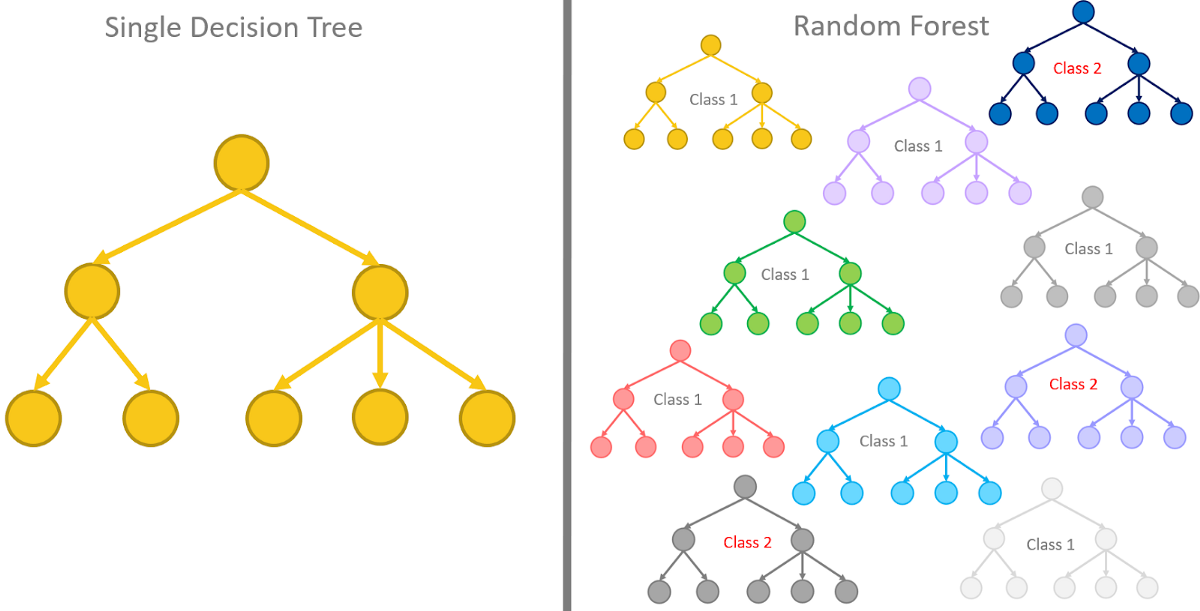

**Advantages:**
1.	It reduces overfitting in decision trees and helps to improve the accuracy
2.	It is flexible to both classification and regression problems
3.	It works well with both categorical and continuous values
4.	It automates missing values present in the data
5.	Normalising of data is not required as it uses a rule-based approach.

**Disadvantages:**
1.	It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
2.	It also requires much time for training as it combines a lot of decision trees to determine the class.
3.	Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

**XGBoost**

XGBoost stands for eXtreme Gradient Boosting.
Boosting is an ensemble learning technique to build a strong classifier from several weak classifiers in series. Boosting algorithms play a crucial role in dealing with bias-variance trade-off.`
XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction. Like Random Forests, XGBoost uses Decision Trees as base learners.
Individual decision trees are low-bias, high-variance models. They are incredibly good at finding the relationships in any type of training data but struggle to generalize well on unseen data.


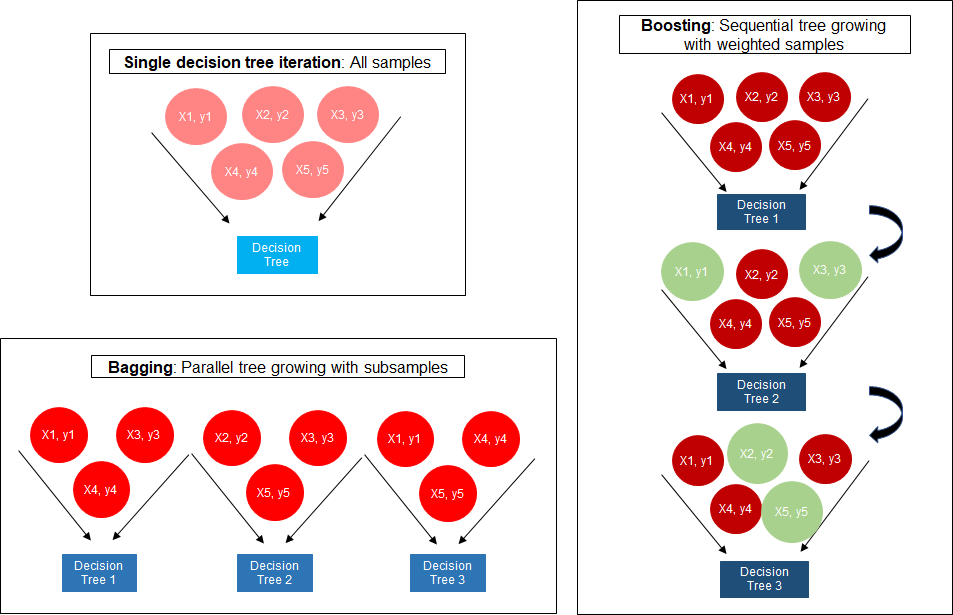


**XGBoost Features**

**1. Regularized Learning:** Regularization term helps to smooth the final learnt weights to avoid over-fitting. The regularized objective will tend to select a model employing simple and predictive functions.

**2. Gradient Tree Boosting:** The tree ensemble model cannot be optimized using traditional optimization methods in Euclidean space. Instead, the model is trained in an additive manner.

**3. Shrinkage and Column Subsampling:** Besides the regularized objective, two additional techniques are used to further prevent overfitting. 
a)	The first technique is shrinkage introduced by Friedman. Shrinkage scales newly added weights by a factor η after each step of tree boosting. Shrinkage reduces the influence of each tree and leaves space for future trees to improve the model. 

b)	The second technique is the column (feature) subsampling. This technique is used in Random Forest. Column sub-sampling prevents over-fitting even more so than the traditional row sub-sampling. The usage of column sub-samples also speeds up computations of the parallel algorithm.


**Advantages:**
1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)
2. Feature importance can be found out(it output importance of each feature, can be used for feature selection)
3. Fast to interpret
4. Outliers have minimal impact.
5. Handles large sized datasets well.
6. Good Execution speed
7. Good model performance (wins most of the Kaggle competitions)
8. Less prone to overfitting

**Disadvantages:**
1. Difficult interpretation , visualization tough
2. Overfitting possible if parameters not tuned properly.
3. Harder to tune as there are too many hyperparameters.


**Linear SVC**

The Support Vector Machine (SVM) technique is a popular and highly accurate machine learning method for classification problems. SVM try to find an optimal hyperplane within the input space to correctly classify the binary (or multi-class classification problem. 

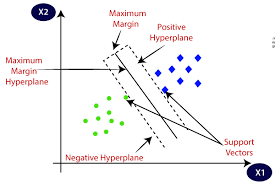


**Advantages:**
1.	SVM works relatively well when there is a clear margin of separation between classes.
2.	SVM is more effective in high dimensional spaces.
3.	SVM is effective in cases where the number of dimensions is greater than the number of samples.
4.	SVM is relatively memory efficient
5.	Outliers have less impact.

**Disadvantages:**
1.	SVM algorithm is not suitable for large data sets.
2.	SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
3.	In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
4.	As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.


**K Nearest Neighbors (k-NN)**

K Nearest Neighbors is a  Supervised Learning algorithm and is  mostly used for classification and also regression. 
KNN algorithm is uses distances such as Euclidean, Manhattan and Minkowski to find the K nearest neighbors in the training data and then uses these labels to predict

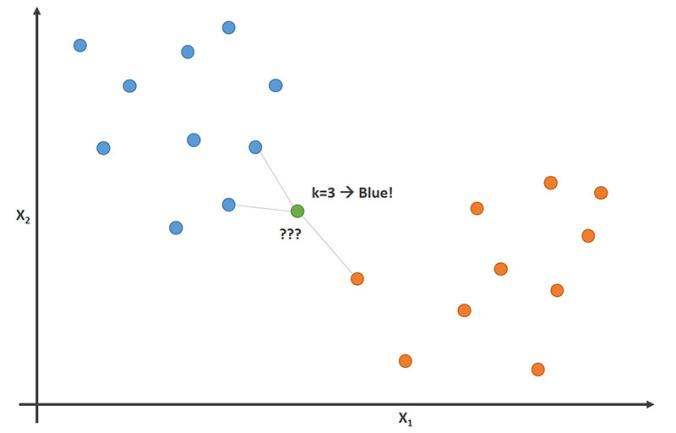


**Advantages:**
1.	Simple to understand and implement
2.	No assumption about data (for e.g. in case of linear regression we assume dependent variable and independent variables are linearly related, in Naïve Bayes we assume features are independent of each other etc., but k-NN makes no assumptions about data)
3.	Constantly evolving model: When it is exposed to new data, it changes to accommodate the new data points.
4.	Lazy algorithms do not need any training data points for model generation
5.	Multi-class problems can also be solved.
6.	One Hyper Parameter: K-NN might take some time while selecting the first hyper parameter but after that rest of the parameters are aligned to it.
7.	All training data used in the testing phase. Hence. training faster and testing phase slower and costlier leading to more memory usage and also more time.

**Disadvantages:**
1. Slow for large datasets.
2. Curse of dimensionality: Does not work very well on datasets with large number of features.
3. Scaling of data absolute must.
4. Does not work well on Imbalanced data. So before using k-NN either under sample majority class
or oversample minority class and have a balanced dataset.
5. Sensitive to outliers.
6. Can’t deal well with missing values

**Naïve Bayes**

A Naive Bayes classifier is an algorithm that uses Bayes’ theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points. The key insight of Bayes’ theorem is that the probability of an event can be adjusted as new data is introduced. These classifiers are widely used for machine learning because they are simple to implement.

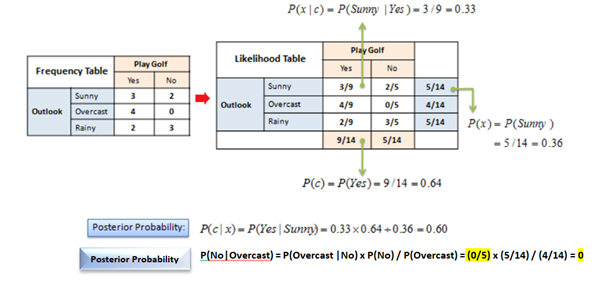


**Advantages:**
1. Real time predictions: It is very fast and can be used in real time.
2. Scalable with Large datasets
3. Insensitive to irrelevant features.
4. Multi class prediction is effectively done in Naive Bayes
5. Good performance with high dimensional data(no. of features is large)

**Disadvantages:**
**1. Independence of features does not hold:** 
The fundamental Naive Bayes assumption is that each feature makes an independent and equal contribution to the outcome. However this condition is not met most of the times.
**2. Bad estimator:**
Probability outputs from predict_proba are not to be taken too seriously.
**3. Training data should represent population well:**
If you have no occurrences of a class label and a certain attribute value together (e.g. class=”No”, shape=”Overcast “) then the posterior probability will be zero. So if the training data is not representative of the population, Naive bayes does not work well.(This problem is removed by smoothening techniques).

 






In [ ]:
rf  = RandomForestClassifier()
xgb = XGBClassifier()
SVC = LinearSVC()
KNN = KNeighborsClassifier()
NB = MultinomialNB()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([rf,xgb, SVC,KNN,NB], 
                         ['Random Forest', 'Xgboost', 'SVC','KNN','Naive Bayes']):
    result[name] = fit_n_print(model,X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

 Classification report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       783
           1       0.00      0.00      0.00         3
           2       0.93      0.42      0.58        31
           3       0.00      0.00      0.00         5
           4       0.66      0.37      0.47        62
           5       1.00      0.17      0.29        35
           6       0.62      0.20      0.30        25
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        15
           9       1.00      0.92      0.96        12
          10       0.50      0.05      0.10        19
          11       0.00      0.00      0.00        34
          12       0.90      0.32      0.47        56
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.

In [ ]:
result_normal = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['accuracy_training','accuracy_test',
                                 'recallscore_training', 'recallscore_test', 
                                 'precision_training','precision_test',
                                 'f1score_training', 'f1score_test', 
                                 'Elapsed'],
                      index= result.keys())   # use the model names as index

result_normal.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_normal

**DEEP LEARNING**

In [ ]:
gloveFileName = '/content/drive/MyDrive/Great_Learning/NLP_sarcasm_detection/glove.6B/glove.6B.200d.txt'

In [ ]:
#Tokenizing and Padding the Independent features

from tensorflow.python.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = 300
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_eng.combined_description.values)
post_seq = tokenizer.texts_to_sequences(data_eng.combined_description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [ ]:
y = data_eng['target']

In [ ]:
#Splitting the data into Train and Test (Ratio = 0.20)
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape

((5608, 300), (1402, 300))

In [ ]:
y_train.shape, y_test.shape

((5608,), (1402,))

In [ ]:
#Creating input dimension ('vocab_size')

vocab_size = len(tokenizer.word_index) + 1
max_features = vocab_size 
vocab_size

15541

In [ ]:
# Creating Output dimension ('num_class')
num_class = len(np.unique(data_eng['target'].values))
num_class

74

**Implementing Bi LSTM**

In [ ]:
max_features = vocab_size  
maxlen = 200
seq_output_size = 128
filters = 64
kernel_size = 5
pool_size = 4
activation_func = 'sigmoid'

In [ ]:
from keras import layers
# For Embedding Layer
from keras.layers.embeddings import Embedding


# Bi directional LSTM
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.2)(x)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)
# Add a classifier
bilstm_model = keras.Model(inputs, outputs)
bilstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         1989248   
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

In [ ]:
#model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
bilstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
bilstm_model.fit(X_train, y_train, batch_size=20, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
281/281 [==============================] - 224s 765ms/step - loss: 2.4381 - acc: 0.5018 - val_loss: 2.0595 - val_acc: 0.5421
Epoch 2/7
281/281 [==============================] - 214s 760ms/step - loss: 1.9049 - acc: 0.5446 - val_loss: 1.9983 - val_acc: 0.5492
Epoch 3/7
281/281 [==============================] - 214s 762ms/step - loss: 1.7174 - acc: 0.5651 - val_loss: 2.0902 - val_acc: 0.5414
Epoch 4/7
281/281 [==============================] - 214s 762ms/step - loss: 1.5482 - acc: 0.5952 - val_loss: 2.1155 - val_acc: 0.5121
Epoch 5/7
281/281 [==============================] - 214s 762ms/step - loss: 1.3914 - acc: 0.6289 - val_loss: 2.1216 - val_acc: 0.4765
Epoch 6/7
281/281 [==============================] - 212s 755ms/step - loss: 1.2440 - acc: 0.6523 - val_loss: 2.1695 - val_acc: 0.5307
Epoch 7/7
281/281 [==============================] - 212s 754ms/step - loss: 1.1261 - acc: 0.6744 - val_loss: 2.2275 - val_acc: 0.5178


In [ ]:
bi_lstm_predicted = bilstm_model.predict(X_test)
bi_lstm_predicted = np.argmax(bi_lstm_predicted, axis=1)
accuracy_score(y_test, bi_lstm_predicted)

0.5178316690442225